In [5]:
!pip install tensorflow

!pip install --upgrade keras

!pip install --upgrade matplotlib

import matplotlib.pyplot as plt

import pickle
import numpy as np

In [6]:
import pandas as pd

In [7]:
import os
import pickle

# Directory where the extracted bAbI files are located
input_directory = r"C:\Users\Aadityaamlan Panda\Downloads\archive\tasks_1-20_v1-2\en-10k"  # Update this path accordingly

# Specify the file names
train_file_name = "qa6_yes-no-questions_train.txt"
test_file_name = "qa6_yes-no-questions_test.txt"

# Construct full file paths
train_file_path = os.path.join(input_directory, train_file_name)
test_file_path = os.path.join(input_directory, test_file_name)

# Read train and test files
with open(train_file_path, 'r', encoding='utf-8') as train_file:
    train_data = train_file.read()

with open(test_file_path, 'r', encoding='utf-8') as test_file:
    test_data = test_file.read()

# Save as pickle files
train_pickle_file = "train_data.pickle"
test_pickle_file = "test_data.pickle"

with open(train_pickle_file, 'wb') as train_pickle:
    pickle.dump(train_data, train_pickle)

with open(test_pickle_file, 'wb') as test_pickle:
    pickle.dump(test_data, test_pickle)

print(f"Train data saved as {train_pickle_file}")
print(f"Test data saved as {test_pickle_file}")

Train data saved as train_data.pickle
Test data saved as test_data.pickle


In [8]:
train_data.pickle


AttributeError: 'str' object has no attribute 'pickle'

In [ ]:
train_pickle

In [ ]:
train_data=pickle.load(train_pickle)

In [9]:
with open("train_data.pickle","rb") as fp:
    train_data=pickle.load(fp)

In [10]:
with open("test_data.pickle","rb") as fp:
    test_data=pickle.load(fp)

In [11]:
type(test_data)

str

In [12]:
len(test_data)

100109

In [13]:
test_data

'1 Mary got the milk there.\n2 John moved to the bedroom.\n3 Is John in the kitchen? \tno\t2\n4 Mary discarded the milk.\n5 John went to the garden.\n6 Is John in the kitchen? \tno\t5\n7 Daniel moved to the bedroom.\n8 Daniel went to the garden.\n9 Is John in the garden? \tyes\t5\n10 Daniel travelled to the bathroom.\n11 Sandra travelled to the bedroom.\n12 Is Daniel in the bathroom? \tyes\t10\n13 Mary took the football there.\n14 Sandra grabbed the milk there.\n15 Is Daniel in the bedroom? \tno\t10\n1 Daniel went back to the kitchen.\n2 Mary grabbed the apple there.\n3 Is Daniel in the office? \tno\t1\n4 Daniel journeyed to the office.\n5 John went back to the office.\n6 Is Daniel in the hallway? \tno\t4\n7 Mary left the apple.\n8 Daniel went to the hallway.\n9 Is Daniel in the hallway? \tyes\t8\n10 John went to the hallway.\n11 Daniel picked up the milk there.\n12 Is John in the kitchen? \tno\t10\n13 John grabbed the football there.\n14 Mary got the apple there.\n15 Is Daniel in the 

In [14]:
def parse_string_to_list(data_string):
    data_list = []
    lines = data_string.strip().split('\n')
    for i in range(2, len(lines)):
        current_line = lines[i]
        parts = current_line.split('\t')
        if len(parts) >= 2:
            #question = parts[0].strip().split()
            question = [word for word in parts[0].strip().split() if not word.isdigit()]
            answer = parts[1].strip()
              # Extract previous two lines and split them word-wise into lists
            prev1_words = [word for word in lines[i-1].strip().split() if not word.isdigit()]
            prev2_words = [word for word in lines[i-2].strip().split() if not word.isdigit()]
            
            # Join the first two sentences into a single string
            prev1_and_prev2 = ' '.join(prev2_words + prev1_words)
            
            # Append a tuple of combined previous two lines, question, and answer to data_list
            data_list.append((prev1_and_prev2.split(), question, answer))
    return data_list
# Parse string data into list of tuples
test_data = parse_string_to_list(test_data)

# Print the parsed data
print(test_data)

[(['Mary', 'got', 'the', 'milk', 'there.', 'John', 'moved', 'to', 'the', 'bedroom.'], ['Is', 'John', 'in', 'the', 'kitchen?'], 'no'), (['Mary', 'discarded', 'the', 'milk.', 'John', 'went', 'to', 'the', 'garden.'], ['Is', 'John', 'in', 'the', 'kitchen?'], 'no'), (['Daniel', 'moved', 'to', 'the', 'bedroom.', 'Daniel', 'went', 'to', 'the', 'garden.'], ['Is', 'John', 'in', 'the', 'garden?'], 'yes'), (['Daniel', 'travelled', 'to', 'the', 'bathroom.', 'Sandra', 'travelled', 'to', 'the', 'bedroom.'], ['Is', 'Daniel', 'in', 'the', 'bathroom?'], 'yes'), (['Mary', 'took', 'the', 'football', 'there.', 'Sandra', 'grabbed', 'the', 'milk', 'there.'], ['Is', 'Daniel', 'in', 'the', 'bedroom?'], 'no'), (['Daniel', 'went', 'back', 'to', 'the', 'kitchen.', 'Mary', 'grabbed', 'the', 'apple', 'there.'], ['Is', 'Daniel', 'in', 'the', 'office?'], 'no'), (['Daniel', 'journeyed', 'to', 'the', 'office.', 'John', 'went', 'back', 'to', 'the', 'office.'], ['Is', 'Daniel', 'in', 'the', 'hallway?'], 'no'), (['Mary',

In [15]:
train_data


'1 Mary moved to the bathroom.\n2 Sandra journeyed to the bedroom.\n3 Is Sandra in the hallway? \tno\t2\n4 Mary went back to the bedroom.\n5 Daniel went back to the hallway.\n6 Is Daniel in the bathroom? \tno\t5\n7 Sandra went to the kitchen.\n8 Daniel went back to the bathroom.\n9 Is Daniel in the office? \tno\t8\n10 Daniel picked up the football there.\n11 Daniel went to the bedroom.\n12 Is Daniel in the bedroom? \tyes\t11\n13 John travelled to the office.\n14 Sandra went to the garden.\n15 Is Daniel in the bedroom? \tyes\t11\n1 Sandra got the football there.\n2 Mary went to the bedroom.\n3 Is Mary in the bedroom? \tyes\t2\n4 Daniel got the apple there.\n5 Sandra travelled to the hallway.\n6 Is Sandra in the office? \tno\t5\n7 Sandra moved to the garden.\n8 Mary travelled to the kitchen.\n9 Is Sandra in the bathroom? \tno\t7\n10 Sandra went back to the bedroom.\n11 Daniel put down the apple.\n12 Is Sandra in the bathroom? \tno\t10\n13 Sandra put down the football.\n14 Sandra journeye

In [16]:
train_data

'1 Mary moved to the bathroom.\n2 Sandra journeyed to the bedroom.\n3 Is Sandra in the hallway? \tno\t2\n4 Mary went back to the bedroom.\n5 Daniel went back to the hallway.\n6 Is Daniel in the bathroom? \tno\t5\n7 Sandra went to the kitchen.\n8 Daniel went back to the bathroom.\n9 Is Daniel in the office? \tno\t8\n10 Daniel picked up the football there.\n11 Daniel went to the bedroom.\n12 Is Daniel in the bedroom? \tyes\t11\n13 John travelled to the office.\n14 Sandra went to the garden.\n15 Is Daniel in the bedroom? \tyes\t11\n1 Sandra got the football there.\n2 Mary went to the bedroom.\n3 Is Mary in the bedroom? \tyes\t2\n4 Daniel got the apple there.\n5 Sandra travelled to the hallway.\n6 Is Sandra in the office? \tno\t5\n7 Sandra moved to the garden.\n8 Mary travelled to the kitchen.\n9 Is Sandra in the bathroom? \tno\t7\n10 Sandra went back to the bedroom.\n11 Daniel put down the apple.\n12 Is Sandra in the bathroom? \tno\t10\n13 Sandra put down the football.\n14 Sandra journeye

In [17]:
def parse_string_to_list(data_string):
    data_list = []
    lines = data_string.strip().split('\n')
    for i in range(2, len(lines)):
        current_line = lines[i]
        parts = current_line.split('\t')
        if len(parts) >= 2:
            #question = parts[0].strip().split()
            question = [word for word in parts[0].strip().split() if not word.isdigit()]
            answer = parts[1].strip()
              # Extract previous two lines and split them word-wise into lists
            prev1_words = [word for word in lines[i-1].strip().split() if not word.isdigit()]
            prev2_words = [word for word in lines[i-2].strip().split() if not word.isdigit()]
            
            # Join the first two sentences into a single string
            prev1_and_prev2 = ' '.join(prev2_words + prev1_words)
            
            # Append a tuple of combined previous two lines, question, and answer to data_list
            data_list.append((prev1_and_prev2.split(), question, answer))
    return data_list

# Parse string data into list of tuples
train_data = parse_string_to_list(train_data)

# Print the parsed data
print(train_data)



[(['Mary', 'moved', 'to', 'the', 'bathroom.', 'Sandra', 'journeyed', 'to', 'the', 'bedroom.'], ['Is', 'Sandra', 'in', 'the', 'hallway?'], 'no'), (['Mary', 'went', 'back', 'to', 'the', 'bedroom.', 'Daniel', 'went', 'back', 'to', 'the', 'hallway.'], ['Is', 'Daniel', 'in', 'the', 'bathroom?'], 'no'), (['Sandra', 'went', 'to', 'the', 'kitchen.', 'Daniel', 'went', 'back', 'to', 'the', 'bathroom.'], ['Is', 'Daniel', 'in', 'the', 'office?'], 'no'), (['Daniel', 'picked', 'up', 'the', 'football', 'there.', 'Daniel', 'went', 'to', 'the', 'bedroom.'], ['Is', 'Daniel', 'in', 'the', 'bedroom?'], 'yes'), (['John', 'travelled', 'to', 'the', 'office.', 'Sandra', 'went', 'to', 'the', 'garden.'], ['Is', 'Daniel', 'in', 'the', 'bedroom?'], 'yes'), (['Sandra', 'got', 'the', 'football', 'there.', 'Mary', 'went', 'to', 'the', 'bedroom.'], ['Is', 'Mary', 'in', 'the', 'bedroom?'], 'yes'), (['Daniel', 'got', 'the', 'apple', 'there.', 'Sandra', 'travelled', 'to', 'the', 'hallway.'], ['Is', 'Sandra', 'in', 'the'

In [18]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway?'],
  'no'),
 (['Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom?'],
  'no'),
 (['Sandra',
   'went',
   'to',
   'the',
   'kitchen.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom.'],
  ['Is', 'Daniel', 'in', 'the', 'office?'],
  'no'),
 (['Daniel',
   'picked',
   'up',
   'the',
   'football',
   'there.',
   'Daniel',
   'went',
   'to',
   'the',
   'bedroom.'],
  ['Is', 'Daniel', 'in', 'the', 'bedroom?'],
  'yes'),
 (['John',
   'travelled',
   'to',
   'the',
   'office.',
   'Sandra',
   'went',
   'to',
   'the',
   'garden.'],
  ['Is', 'Daniel', 'in', 'the', 'bedroom?'],
  'yes'),
 (['Sandra',
   'got',
   'the',
   'football',
   'there.',
   'Mary',
   'went',
   'to'

In [19]:
train_data[0][2]


'no'

In [20]:
type(test_data)

list

In [21]:
len(train_data)

10000

In [22]:
' '.join(train_data[0][0])

'Mary moved to the bathroom. Sandra journeyed to the bedroom.'

In [23]:
' '.join(train_data[0][1])

'Is Sandra in the hallway?'

In [24]:
train_data[0][2]

'no'

In [25]:
vocab = set()

In [26]:
all_data = test_data+train_data

In [27]:
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [28]:
vocab.add('yes')
vocab.add('no')

In [29]:
vocab

{'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'apple.',
 'back',
 'bathroom.',
 'bathroom?',
 'bedroom.',
 'bedroom?',
 'discarded',
 'down',
 'dropped',
 'football',
 'football.',
 'garden.',
 'garden?',
 'got',
 'grabbed',
 'hallway.',
 'hallway?',
 'in',
 'journeyed',
 'kitchen.',
 'kitchen?',
 'left',
 'milk',
 'milk.',
 'moved',
 'no',
 'office.',
 'office?',
 'picked',
 'put',
 'the',
 'there.',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [30]:
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom.'],
  ['Is', 'John', 'in', 'the', 'kitchen?'],
  'no'),
 (['Mary',
   'discarded',
   'the',
   'milk.',
   'John',
   'went',
   'to',
   'the',
   'garden.'],
  ['Is', 'John', 'in', 'the', 'kitchen?'],
  'no'),
 (['Daniel',
   'moved',
   'to',
   'the',
   'bedroom.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden.'],
  ['Is', 'John', 'in', 'the', 'garden?'],
  'yes'),
 (['Daniel',
   'travelled',
   'to',
   'the',
   'bathroom.',
   'Sandra',
   'travelled',
   'to',
   'the',
   'bedroom.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom?'],
  'yes'),
 (['Mary',
   'took',
   'the',
   'football',
   'there.',
   'Sandra',
   'grabbed',
   'the',
   'milk',
   'there.'],
  ['Is', 'Daniel', 'in', 'the', 'bedroom?'],
  'no'),
 (['Daniel',
   'went',
   'back',
   'to',
   'the',
   'kitchen.',
   'Mary',
   'grabbed',
   'the',
   'apple',
   'there.'],
  ['Is', 'Daniel', 

In [31]:
len (vocab)

44

In [32]:
vocab_len=len(vocab)+1

In [33]:
for data in all_data:
    print (len(data[0]))
    print('\n')

10


9


10


10


10


11


11


9


11


10


10


10


11


10


9


10


11


11


10


10


10


10


10


9


10


10


11


9


10


9


10


12


11


10


10


11


9


11


11


10


11


11


10


10


11


11


10


9


11


10


11


11


11


10


11


11


10


10


11


10


11


10


10


11


9


10


11


11


10


10


10


11


10


11


9


10


11


9


10


10


10


10


10


10


10


11


10


10


10


9


11


10


12


10


11


10


11


10


10


10


10


11


11


10


9


10


10


10


11


11


11


10


10


11


10


10


9


10


10


10


10


11


10


9


11


10


10


11


10


10


10


10


11


10


11


12


10


9


10


11


10


9


10


11


9


10


10


10


11


10


11


10


10


10


10


10


11


10


11


10


10


10


10


9


9


10


10


10


10


11


11


11


10


10


10


11


10


10


10


11


10


10


11


10


11


10


10


10


10


10


10


10


10


10


11


10


11


9


12


10


10


10


11


10


1

In [34]:
max_story_len = max([len(data[0]) for data in all_data])
max_ques_len = max([len(data[1]) for data in all_data])

In [35]:
vocab

{'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'apple.',
 'back',
 'bathroom.',
 'bathroom?',
 'bedroom.',
 'bedroom?',
 'discarded',
 'down',
 'dropped',
 'football',
 'football.',
 'garden.',
 'garden?',
 'got',
 'grabbed',
 'hallway.',
 'hallway?',
 'in',
 'journeyed',
 'kitchen.',
 'kitchen?',
 'left',
 'milk',
 'milk.',
 'moved',
 'no',
 'office.',
 'office?',
 'picked',
 'put',
 'the',
 'there.',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer



In [37]:
tokenizer = Tokenizer(filters=[])

In [38]:
tokenizer.fit_on_texts(vocab)

In [39]:
tokenizer.word_index

{'bathroom?': 1,
 'milk.': 2,
 'kitchen.': 3,
 'down': 4,
 'back': 5,
 'journeyed': 6,
 'office.': 7,
 'bedroom.': 8,
 'grabbed': 9,
 'mary': 10,
 'travelled': 11,
 'john': 12,
 'is': 13,
 'bathroom.': 14,
 'milk': 15,
 'dropped': 16,
 'garden?': 17,
 'hallway?': 18,
 'picked': 19,
 'went': 20,
 'football': 21,
 'the': 22,
 'no': 23,
 'there.': 24,
 'got': 25,
 'garden.': 26,
 'daniel': 27,
 'kitchen?': 28,
 'apple.': 29,
 'sandra': 30,
 'up': 31,
 'in': 32,
 'discarded': 33,
 'apple': 34,
 'football.': 35,
 'yes': 36,
 'office?': 37,
 'moved': 38,
 'hallway.': 39,
 'put': 40,
 'to': 41,
 'left': 42,
 'bedroom?': 43,
 'took': 44}

In [40]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [41]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [42]:
 len(train_story_text)

10000

In [43]:
train_story_seq

[[10, 38, 41, 22, 14, 30, 6, 41, 22, 8],
 [10, 20, 5, 41, 22, 8, 27, 20, 5, 41, 22, 39],
 [30, 20, 41, 22, 3, 27, 20, 5, 41, 22, 14],
 [27, 19, 31, 22, 21, 24, 27, 20, 41, 22, 8],
 [12, 11, 41, 22, 7, 30, 20, 41, 22, 26],
 [30, 25, 22, 21, 24, 10, 20, 41, 22, 8],
 [27, 25, 22, 34, 24, 30, 11, 41, 22, 39],
 [30, 38, 41, 22, 26, 10, 11, 41, 22, 3],
 [30, 20, 5, 41, 22, 8, 27, 40, 4, 22, 29],
 [30, 40, 4, 22, 35, 30, 6, 41, 22, 7],
 [30, 20, 5, 41, 22, 39, 30, 38, 41, 22, 7],
 [10, 38, 41, 22, 39, 27, 6, 41, 22, 26],
 [10, 6, 41, 22, 7, 10, 20, 5, 41, 22, 39],
 [12, 9, 22, 34, 24, 10, 38, 41, 22, 26],
 [27, 20, 5, 41, 22, 39, 12, 6, 41, 22, 14],
 [30, 38, 41, 22, 7, 12, 20, 5, 41, 22, 26],
 [30, 20, 41, 22, 39, 30, 20, 41, 22, 3],
 [10, 20, 41, 22, 7, 30, 25, 22, 34, 24],
 [10, 6, 41, 22, 39, 10, 6, 41, 22, 8],
 [10, 6, 41, 22, 26, 10, 20, 41, 22, 3],
 [27, 42, 22, 29, 27, 38, 41, 22, 3],
 [30, 20, 5, 41, 22, 14, 30, 9, 22, 34, 24],
 [12, 16, 22, 35, 12, 25, 22, 21, 24],
 [27, 11, 41, 22,

In [44]:
def vectorize_stories(data, word_index = tokenizer.word_index, max_story_len = max_story_len, max_ques_len = max_ques_len):
    X=[]#stories
    Xq=[] #query/question
    Y=[] #correct answer
    for story, query, answer in data:
        x=[word_index[word.lower()] for word in story]
        xq=[word_index[word.lower()] for word in query]
        y= np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return(pad_sequences(X, maxlen = max_story_len),pad_sequences(X, maxlen = max_ques_len),np.array(Y))

In [45]:
inputs_train,queries_train,answers_train = vectorize_stories(train_data)

In [46]:
inputs_test,queries_test,answers_test = vectorize_stories(test_data)

In [47]:
inputs_train

array([[ 0,  0, 10, ..., 41, 22,  8],
       [10, 20,  5, ..., 41, 22, 39],
       [ 0, 30, 20, ..., 41, 22, 14],
       ...,
       [ 0,  0, 30, ..., 41, 22,  8],
       [ 0, 10, 40, ..., 22, 15, 24],
       [ 0,  0, 30, ..., 22, 34, 24]])

In [48]:
queries_train

array([[30,  6, 41, 22,  8],
       [20,  5, 41, 22, 39],
       [20,  5, 41, 22, 14],
       ...,
       [10,  6, 41, 22,  8],
       [30, 25, 22, 15, 24],
       [30, 44, 22, 34, 24]])

In [49]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
tokenizer.word_index['yes']

36

In [52]:
tokenizer.word_index['no']

23

In [53]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [54]:
input_sequence = Input((max_story_len,))

In [55]:
question = Input((max_ques_len,))

In [56]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [57]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len, output_dim = max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [58]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len, output_dim = 64, input_length = max_ques_len))
question_encoder.add(Dropout(0.3))

C:\Users\Aadityaamlan Panda\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [59]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [60]:
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [61]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [62]:
answer = concatenate([response,question_encoded])

In [63]:
answer

<KerasTensor shape=(None, 5, 76), dtype=float32, sparse=False, name=keras_tensor_18>

In [64]:
answer = LSTM(32)(answer)

In [65]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [66]:
answer = Activation('softmax')(answer)


In [67]:
model = Model([input_sequence, question], answer)

In [68]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [69]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 12)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_1 (InputLayer)    │ (None, 5)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential (Sequential)       │ (None, 12, 64)            │           2,880 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential_2 (Sequential)     │ (None, 5, 64)             │           2,880 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dot (Dot)                     │ (None, 12, 5)             │               0 │ sequential[0][0],          │
│                               │                           │                 │ sequential_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 12, 5)             │               0 │ dot[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential_1 (Sequential)     │ (None, 12, 5)             │             225 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 12, 5)             │               0 │ activation[0][0],          │
│                               │                           │                 │ sequential_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ permute (Permute)             │ (None, 5, 12)             │               0 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 5, 76)             │               0 │ permute[0][0],             │
│                               │                           │                 │ sequential_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 32)                │          13,952 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 32)                │               0 │ lstm[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 45)                │           1,485 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 45)                │               0 │ dense[0][0]                │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 21,422 (83.68 KB)

 Trainable params: 21,422 (83.68 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
history = model.fit([inputs_train, queries_train], answers_train, batch_size = 32, epochs = 20, validation_data = ([inputs_test, queries_test], answers_test))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4713 - loss: 1.6603 - val_accuracy: 0.4970 - val_loss: 0.6952
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5164 - loss: 0.7126 - val_accuracy: 0.5030 - val_loss: 0.6995
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4931 - loss: 0.7013 - val_accuracy: 0.5160 - val_loss: 0.6930
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5026 - loss: 0.6975 - val_accuracy: 0.4970 - val_loss: 0.6933
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5113 - loss: 0.6949 - val_accuracy: 0.4970 - val_loss: 0.6938
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4896 - loss: 0.6973 - val_accuracy: 0.4970 - val_loss: 0.6932
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5039 - loss: 0.6954 - val_accuracy: 0.4970 - val_loss: 0.6958
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5043 - loss: 0.6946 - val_accuracy: 0.

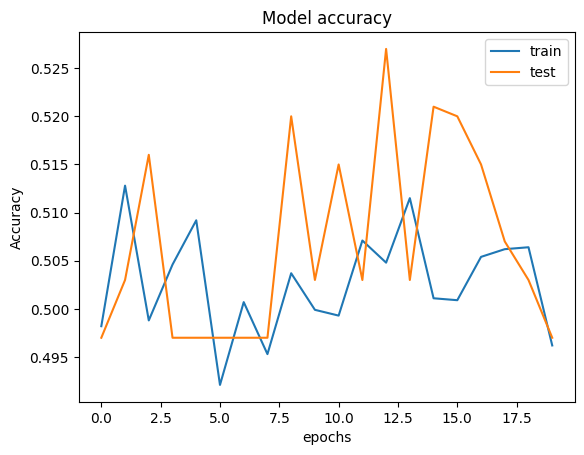

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend(["train", "test"])

In [79]:
model.save("chatbot_model.keras")

In [80]:
model.load_weights("chatbot_model.keras")

In [81]:
pred_results = model.predict(([inputs_test, queries_test]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [82]:

test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom.']

In [83]:
story = ' '.join(word for word in test_data[10][0])

In [84]:
story


'John moved to the hallway. Sandra went to the bedroom.'

In [85]:
query = ' '.join(word for word in test_data[10][1])

In [86]:
query

'Is John in the hallway?'

In [87]:
test_data[10][2]

'yes'

In [88]:
val_max=np.argmax(pred_results[10])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k=key
        
print("Predicted Answer is", k)
print("Probability of certainty",pred_results[10][val_max])

Predicted Answer is yes
Probability of certainty 0.56296796


In [89]:
vocab


{'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'apple.',
 'back',
 'bathroom.',
 'bathroom?',
 'bedroom.',
 'bedroom?',
 'discarded',
 'down',
 'dropped',
 'football',
 'football.',
 'garden.',
 'garden?',
 'got',
 'grabbed',
 'hallway.',
 'hallway?',
 'in',
 'journeyed',
 'kitchen.',
 'kitchen?',
 'left',
 'milk',
 'milk.',
 'moved',
 'no',
 'office.',
 'office?',
 'picked',
 'put',
 'the',
 'there.',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
#make our own story

In [ ]:
story = "Mary dropped the football. Sandra discarded the apple in kitchen. Daniel went to office." 

In [ ]:
story.split()

In [ ]:
my_question = "Is Daniel in the office."
my_question.split()

In [ ]:
mydata = [(story.split(), my_question.split(),'yes')]

In [ ]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [ ]:
pred_results = model.predict(([my_story,my_ques]))

In [ ]:
val_max=np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k=key
        
print("Predicted Answer is", k)
print("Probability of certainty",pred_results[0][val_max])